# Old World + Leviathan



In [1]:
# Add the project base directory to the path
import os
import sys
project_dir = os.path.abspath('../../')
sys.path.insert(0, project_dir)
# Import GUARD
from guard import World, analysis, default_parameters
import copy

In [2]:
def simulation(world, n_sim):
    imperial_density = []
    
    for sim in range(n_sim):
        world.reset()
        imperial_density.append(analysis.ImperialDensity(world))
        for step in range(1500):
            world.step()
            imperial_density[sim].sample()
            if (world.step_number)%500 == 0:
                print('simulation: {:2d}\tstep: {:4d}'.format(sim+1,world.step_number))
                #analysis.plot_ultrasocietal_traits(world)
                #analysis.plot_polities(world)
                #LEVIATHAN
                #analysis.plot_yields(world)
                #analysis.plot_depletion(world)
                #analysis.plot_comfort(world)
                #analysis.plot_expectations(world)
                #analysis.plot_paradigms(world)
        max_polity_sizes = world.end()#FOR POWERLAW TRACKING
            
    return max_polity_sizes

### Old World with Leviathan model added -- Power law testing
To the Old World simulation of ultrasociety traits and the spread of military tech, Leviathan adds simple simulation of basic agriculture and soil depletion/regeneration according to land use rules held in paradigms that spread from community to community based on expectations that are themselves based on the feedback from communities already using that paradigm (akin to the feedback in the "structuring structures" of Bourdieu's habitus).

Communities become more or less comfortable according to the yields returned through paradigm rules and current soil depletion, with communities of higher ultrasociety needing higher yields to remain comfortable. When uncomfortable, communities mutate a new paradigm with randomized rules added or adopt a paradigm followed by their neighbours. Paradigms also spread (like ultrasociety traits in the original model) on "ethnocide".

Power law testing is the basic test (though not sufficient) of self-organized criticality (Bak, Tang and Wiesenfeld, 1987, 1988), wherein the system self-organizes towards a critical state (phase transition), like in the cascading evolution of avalanches, stock markets and even wars (Roberts and Turcotte, 1998).

In [3]:
params = copy.deepcopy(default_parameters)

params = params._replace(spread_para_on_ethnocide=True)
# use the added Leviathan agricultural and paradigm spread models
params = params._replace(icono=True)
# Use simple contagion-style spread? 'Perfect' or 'FutureDiscounted'
# else None use feedback "structuring structure" style 'Icono'
params = params._replace(contagion=None)

params = params._replace(num_icono_loops=2)
params = params._replace(workrate_change=0.1)
params = params._replace(threshold=4)
params = params._replace(mut_amount=9)
params = params._replace(mutation_rate=0.0125)

world = World.from_file(project_dir+'/data/old_world.yml', params)

#SIMULATION (for power law testing)
max_polity_sizes = simulation(world, 1)
#print (max_polity_sizes)

simulation:  1	step:  500
simulation:  1	step: 1000
simulation:  1	step: 1500


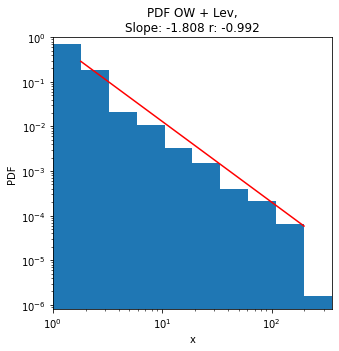

In [4]:
#tester = [0,101, 1, 1, 2, 1, 1, 1, 30, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 5, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 5, 14, 21, 59, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 2, 8, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 103, 1, 1, 31, 2, 49, 1, 1, 8, 1, 3, 1, 3, 1, 1, 1, 18, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 10, 1, 13, 75, 7, 12, 6, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 5, 1, 1, 1, 4, 2, 3, 2, 1, 1, 1, 8, 51, 36, 2, 11, 20, 35, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 2, 1, 2, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 4, 1, 2, 1, 65, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]
#analysis.logLogHistogramOut(tester, 'OW + Lev', bin_multiplier=1.8)

analysis.logLogHistogramOut(max_polity_sizes, 'OW + Lev', bin_multiplier=1.8)

### Old World simulations (original model without Leviathan)

In [5]:
world = World.from_file(project_dir+'/data/old_world.yml', default_parameters)

#SIMULATION (for power law testing)
max_polity_sizes = simulation(world, 1)
#print (max_polity_sizes)

simulation:  1	step:  500
simulation:  1	step: 1000
simulation:  1	step: 1500


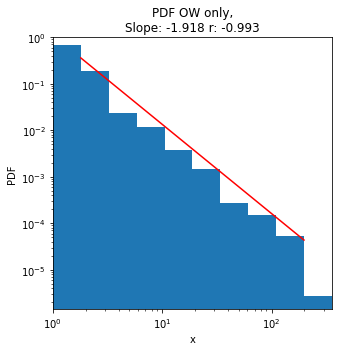

In [6]:
analysis.logLogHistogramOut(max_polity_sizes, 'OW only', bin_multiplier=1.8)